In [30]:
import os
import pandas as pd
import plotly.express as px
import json
import plot_cells.visualize
import numpy as np
# from 

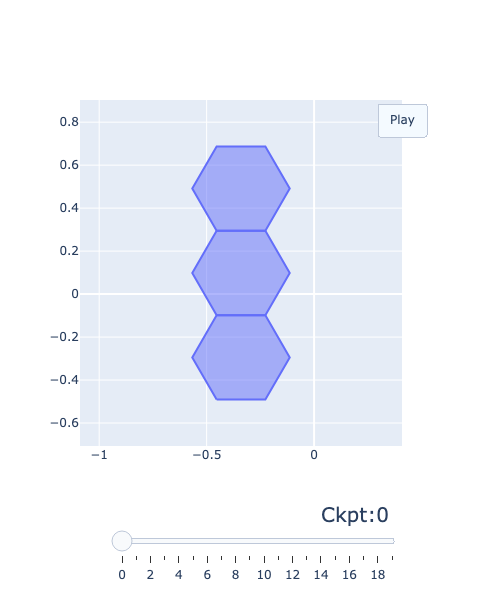

In [31]:


ckpts_dir = "../scratch/"
tiss_ckpt_fps = []
for fn in sorted(os.listdir(ckpts_dir)):
    if fn.endswith(".json") and fn.startswith("res"):
        tiss_ckpt_fps.append(os.path.join(ckpts_dir, fn))
# tiss_ckpt_fns = sorted([fn for fn in os.listdir(ckpts_dir) if fn.endswith(".json") and fn.startswith("res")])

plot_cells.visualize.make_plotly_visualizer(
    tiss_ckpt_fps,
    # vertices_to_highlight=[0],
)

In [8]:
from tissue_builder.hexagonal import HexagonalCellMesh
# import plotly.graph_objects as go
# fig = go.Figure(go.Scatter(x=[1,3,None,2,4], y=[4,2,None,4,2],
#             marker= dict(size=10,symbol= "arrow-bar-up", angleref="previous")))
# fig.update_layout(width=500, height=300)
# fig.show()

In [28]:
import json

# cm = HexagonalCellMesh(
#     side_length=1.0,
#     box_lx=3,
#     box_ly=3,
# )
# cm.set_all_A0(1)
# cm.set_all_P0(1)
# cm.build_vm_mesh("../scratch/nb_example.json")

with open("../scratch/example.json") as f:
    exam_obj = json.load(f)

# exam_obj

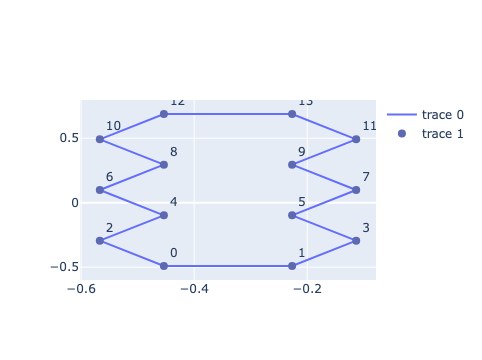

In [29]:
import plotly.graph_objects as go
import pandas as pd

# df = pd.DataFrame({'world_rank': [1, 2, 3, 4, 5],
#                    'university_name': ['Harvard', 'MIT', 'Stanford', 'Cambridge', 'Oxford'],
#                    'citations': [98.8, 98.7, 97.6, 97.5, 96]})
# df = pd.
df_data = []
for vtx in exam_obj['mesh']['vertices']:
    df_data.append({
        "vtx_id": vtx['id'],
        "x": vtx['r'][0],
        "y": vtx['r'][1],
    })
df = pd.DataFrame(df_data)
boundary_data = []
# for 
bound_faces = [f for f in exam_obj['mesh']['faces'] if f['outer']]
if len(bound_faces) != 1:
    raise Exception()
for v in bound_faces[0]['vertices'] + [bound_faces[0]['vertices'][0]]:
    vtx = exam_obj['mesh']['vertices'][v]
    boundary_data.append({
        "x": vtx['r'][0],
        'y': vtx['r'][1],
    })
boundary_df = pd.DataFrame(boundary_data)
# layout = dict(plot_bgcolor='white',
#               margin=dict(t=20, l=20, r=20, b=20),
#               xaxis=dict(title='World Rank',
#                          range=[0.9, 5.5],
#                          linecolor='#d9d9d9',
#                          showgrid=False,
#                          mirror=True),
#               yaxis=dict(title='Citations',
#                          range=[95.5, 99.5],
#                          linecolor='#d9d9d9',
#                          showgrid=False,
#                          mirror=True))

data = go.Scatter(x=df['x'],
                  y=df['y'],
                  text=df['vtx_id'],
                  textposition='top right',
                  # textfont=dict(color='#E58606'),
                  mode='markers+text',
                  marker=dict(color='#5D69B1', size=8),
                  line=dict(color='#52BCA3', width=1, dash='dash'),
                  # name='citations'
                 )

boundary_plot = go.Scatter(x=boundary_df['x'],y=boundary_df['y'],mode='lines')

fig = go.Figure(data=[boundary_plot, data])

fig.show()